# ACCESS-OM2-025 Comparison

This notebook compares our first pre-release of ACCESS-OM2 with our (hopefully final) ACCESS-OM2 Pre-release, implemented at 0.25°.

We have also added a GM+Redi and a Redi case to the mix. These experiments are designed to explore the role of crude eddy parameterisation at 0.25°.


## Current Status


|**Run Name** | **Forcing** | **Run** | **Status**|
|--------------|---------|-------------------------------------------------|-------------|
|025deg_jra55v13_ryf8485_spinup_A | JRA55 V1.3 RYF8485|  An RYF8485 case with latest V1.3 forcing. Model has 50 vertical levels and mimics our original MOM025 configuration. | 200 years.| 
|025deg_jra55v13_ryf8485_gmredi | JRA55 V1.3 RYF8485|  As for the spinup_A case with both GM and Redi (300m^2/s) switched on. | 150 years.| 
|025deg_jra55v13_ryf8485_redi3 | JRA55 V1.3 RYF8485|  As for the spinup_A case with Redi diffusion (300m^2/s) switched on, but no GM. | 150 years| 
|025deg_jra55v13_ryf8485_KDS75| JRA55 V1.3 RYF8485|  As for the spinup_A case but with 75 levels. | 10 years|

### Notes

**Last updated 12 March 2018**

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import IPython.display
import cmocean as cm

netcdf_index loaded.


/home/157/amh157/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
import importlib

In [3]:
cc.start_cluster()

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 40446:127.0.0.1:40446 vdi-n4.nci.org.au -l amh157


Client Scheduler: tcp://127.0.0.1:43899 Dashboard: http://127.0.0.1:40446,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [4]:
cc.build_index()


Found 2361 new variables
Saving results in database...
Indexing complete.


True

In [5]:
configuration = 'access-om2-025'
expts = cc.get_experiments(configuration)
display(expts)

['025deg_jra55_ryf_broadwell_test',
 '025deg_jra55_ryf_spinup1',
 '025deg_jra55_ryf_spinup2',
 '025deg_jra55_ryf_spinup3',
 '025deg_jra55_ryf_spinup4',
 '025deg_jra55_ryf_spinup5',
 '025deg_jra55_ryf_spinup6',
 '025deg_jra55_ryf_spinup7',
 '025deg_jra55_ryf_spinup7_RCP45',
 '025deg_jra55v13_ryf8485_KDS75',
 '025deg_jra55v13_ryf8485_RCP45',
 '025deg_jra55v13_ryf8485_gmredi',
 '025deg_jra55v13_ryf8485_redi',
 '025deg_jra55v13_ryf8485_redi2',
 '025deg_jra55v13_ryf8485_redi3',
 '025deg_jra55v13_ryf8485_spinup_A']

## Experiments

In [6]:
# This subset of cases are the important ones
esub = [
 '025deg_jra55v13_ryf8485_spinup_A',
 '025deg_jra55v13_ryf8485_gmredi',
 '025deg_jra55v13_ryf8485_redi3',
 '025deg_jra55v13_ryf8485_KDS75',
       ]

## Wind Stress
Just a simple plot showing zonally averaged zonal wind stress from each case.

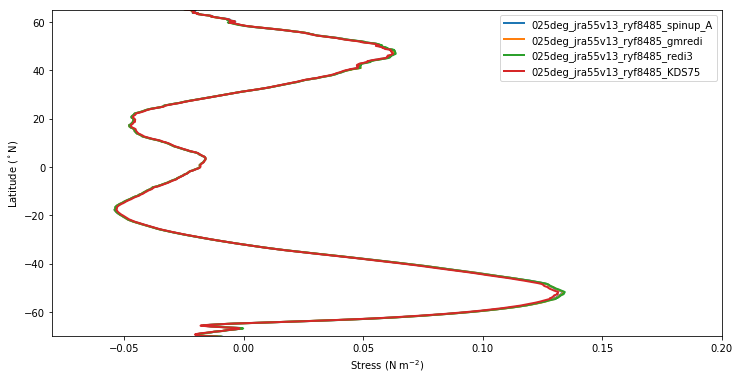

In [7]:
cc.plots.wind_stress(esub)

## Ocean Scalars
The following series of plots shows global timeseries of key metrics.

In [8]:
# If you want to clear stuff
cc.diagnostics.annual_scalar.clear()

In [9]:
variables = ['ke_tot',
             'temp_global_ave', 
             'salt_global_ave',
             'salt_surface_ave',
             'total_ocean_sfc_salt_flux_coupler',
             'eta_global']

plots.annual_scalar() can can take multiple variables at once (producing one figure per variable).  Internally, this is faster than plotting each scalar variable separately because the netCDF files are accessed only once for all the variables at once.

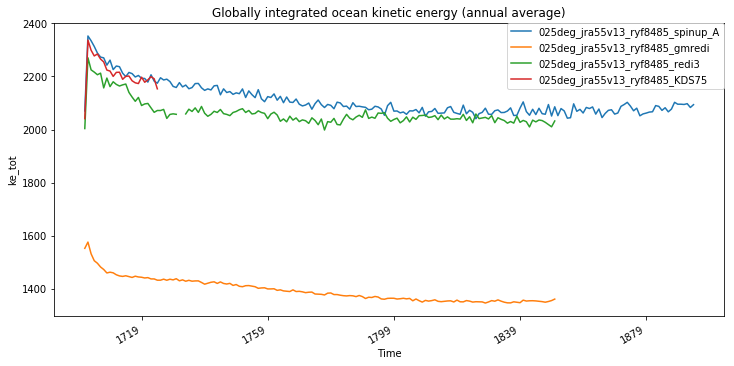

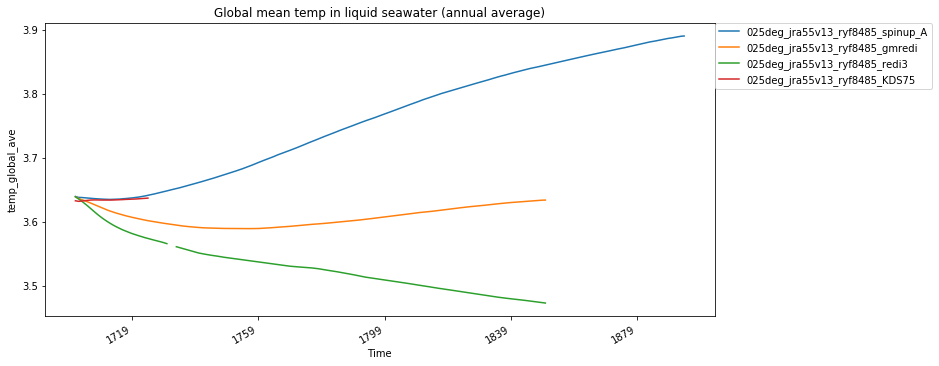

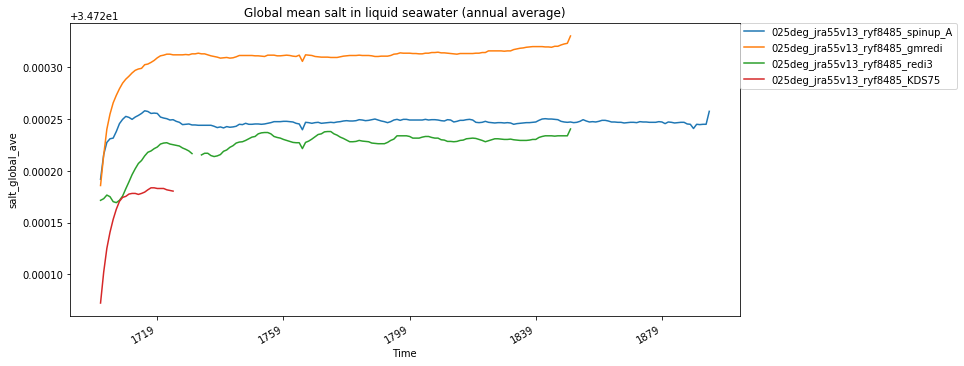

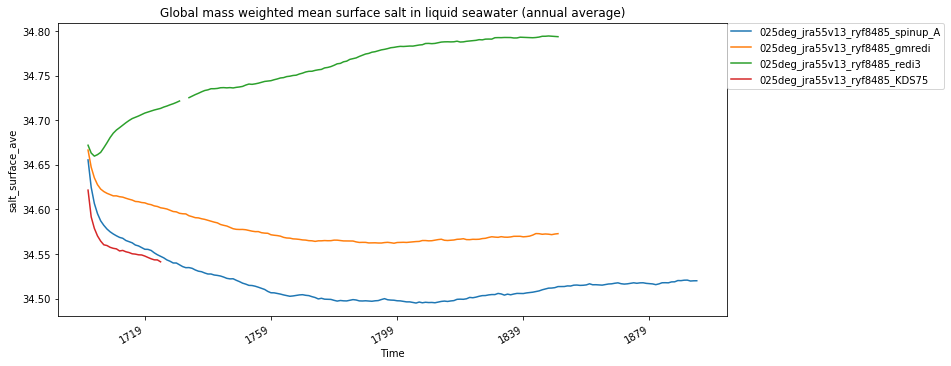

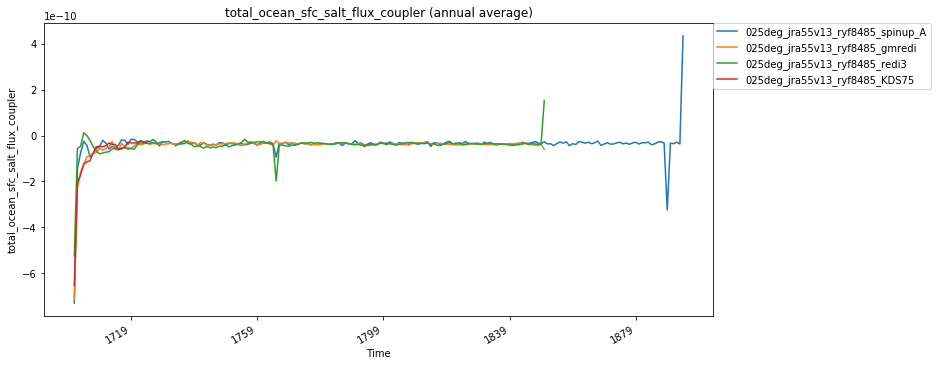

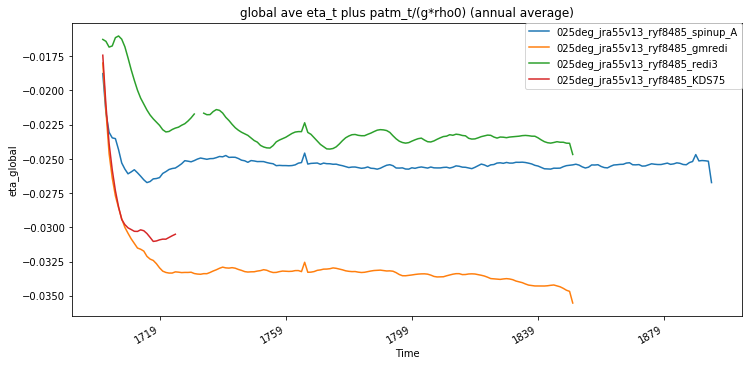

In [10]:
cc.plots.annual_scalar(esub, variables)

# Drake Passage Transport

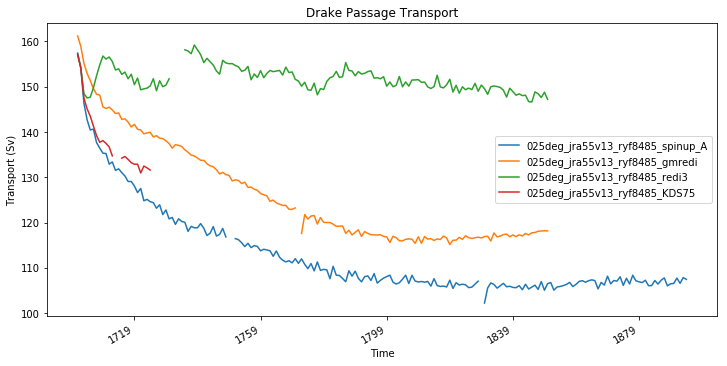

In [11]:
cc.diagnostics.drake_passage.clear()
cc.plots.drake_passage(esub)

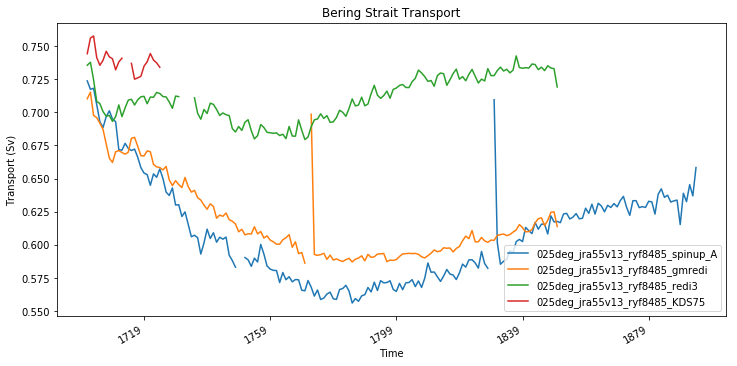

In [12]:
cc.diagnostics.bering_strait.clear()
cc.plots.bering_strait(esub)

# Meridional Overturning Circulation

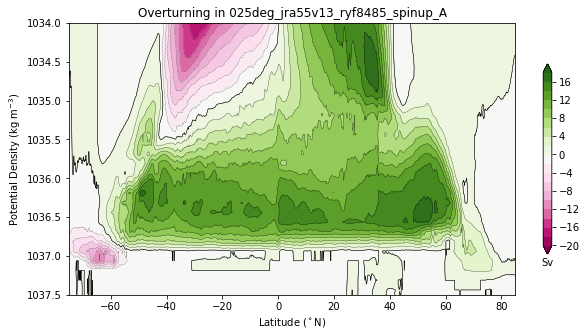

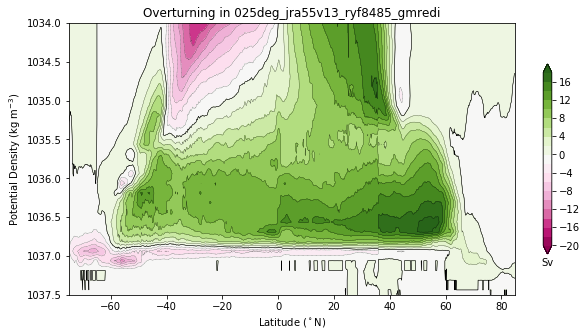

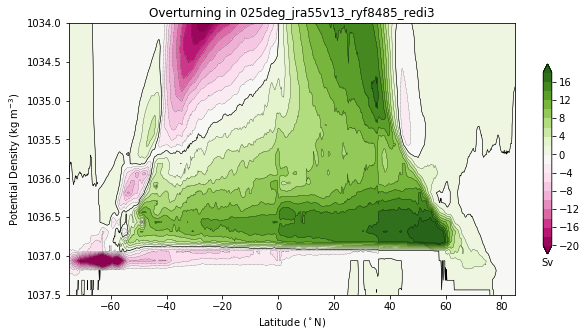

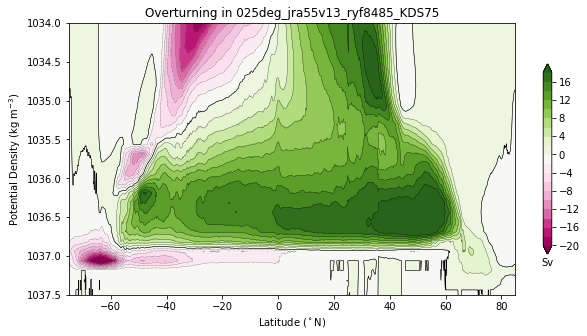

In [13]:
cc.diagnostics.psi_avg.clear()
cc.plots.psi_avg(esub, 10)

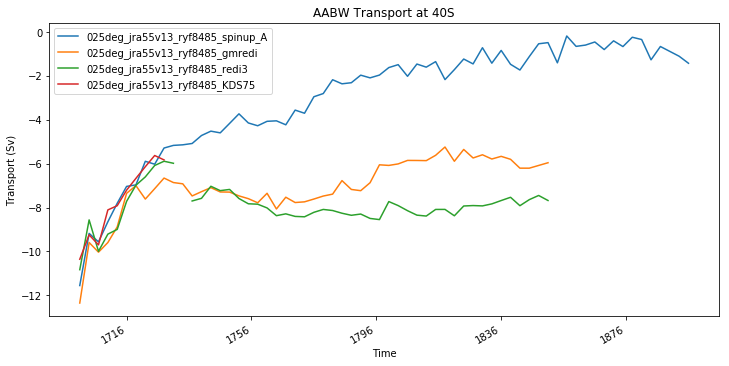

In [7]:
cc.diagnostics.calc_aabw.clear()
cc.plots.aabw(esub)

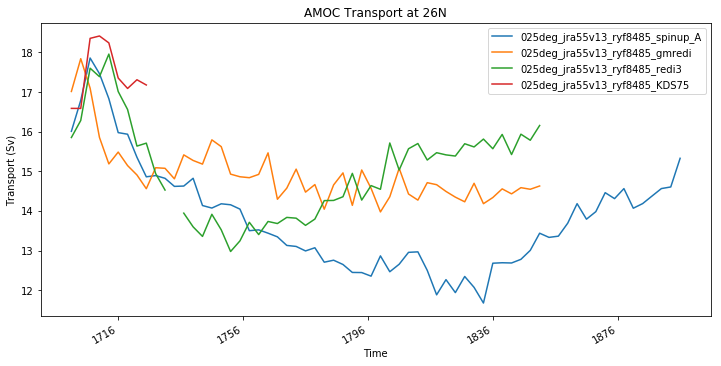

In [15]:
cc.diagnostics.calc_amoc.clear()
cc.plots.amoc(esub)

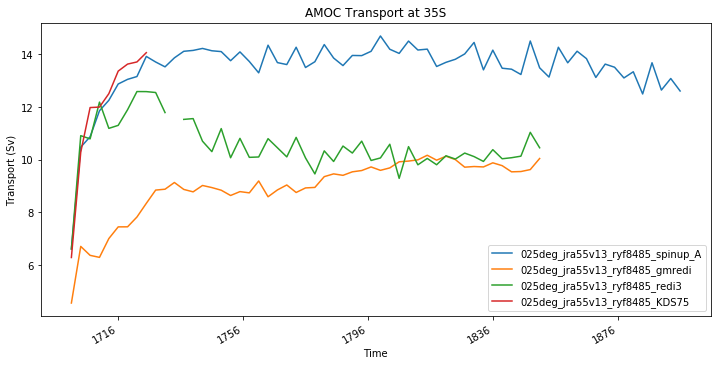

In [16]:
cc.diagnostics.calc_amoc_south.clear()
cc.plots.amoc_south(esub)

# Sea Surface Temperature
LH column shows SST, RH column shows difference from WOA13 long-term average.

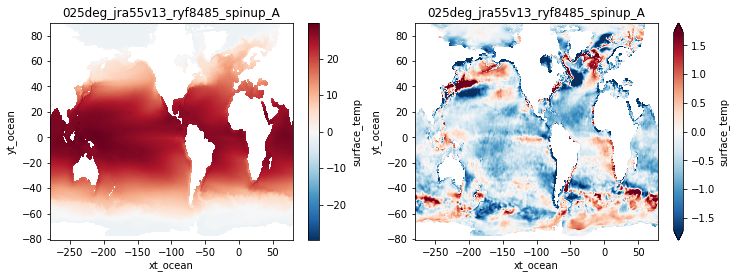

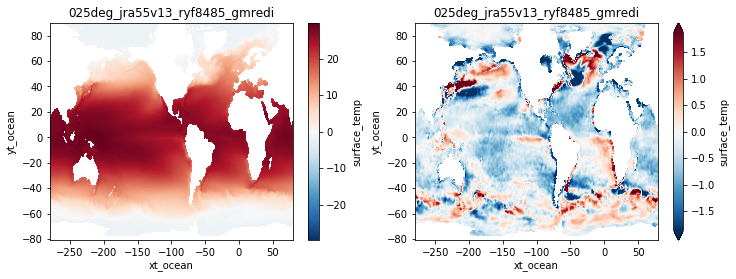

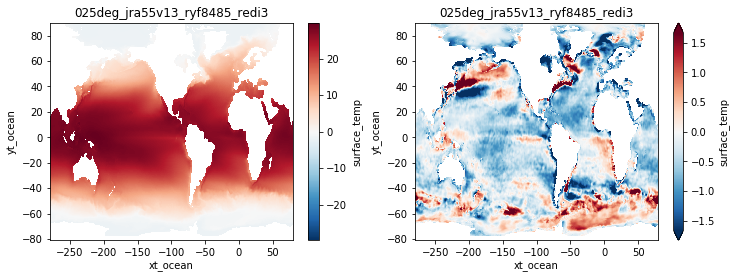

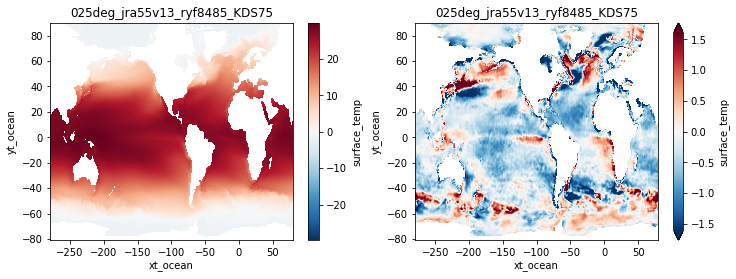

In [17]:
cc.plots.sea_surface_temperature(esub, resolution=0.25)

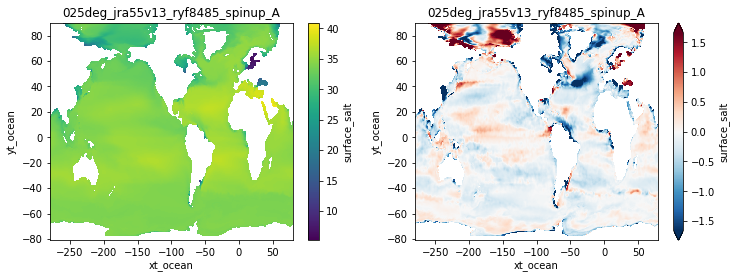

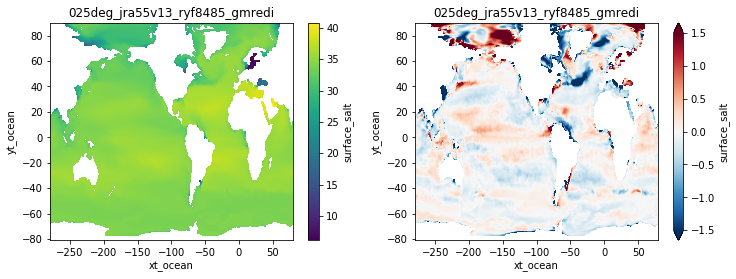

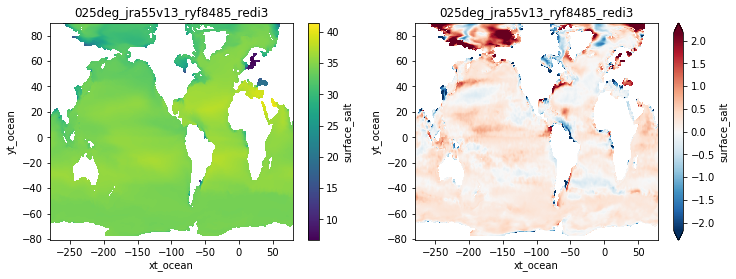

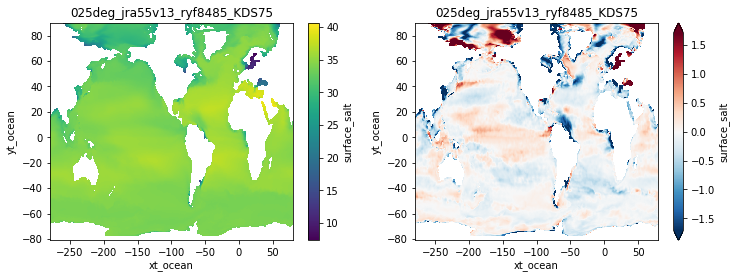

In [18]:
cc.plots.sea_surface_salinity(esub, resolution=0.25)

# Zonal Mean transects

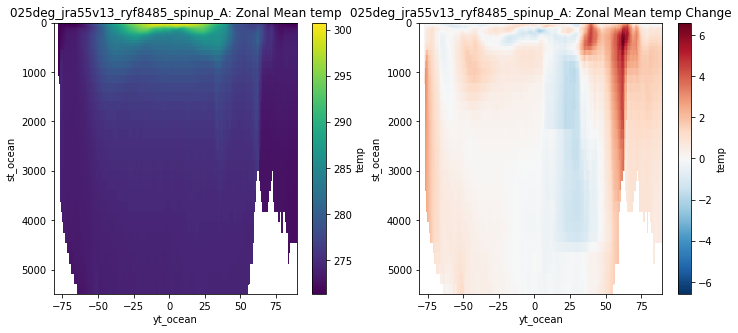

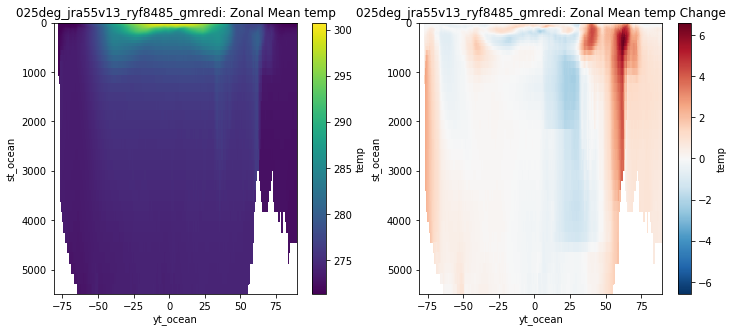

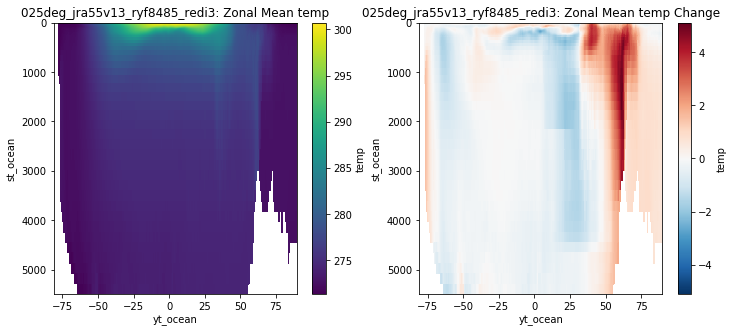

In [19]:
cc.plots.zonal_mean(esub[0:3],'temp',resolution=0.25)

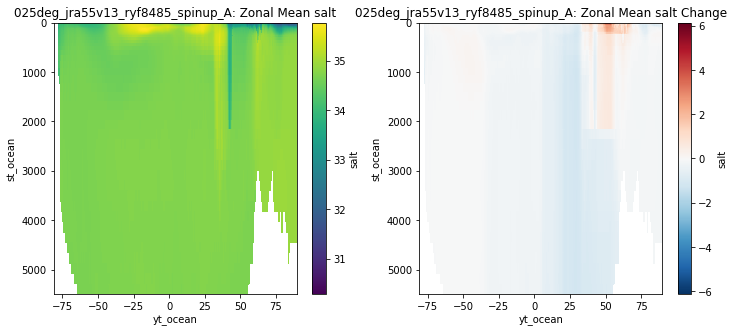

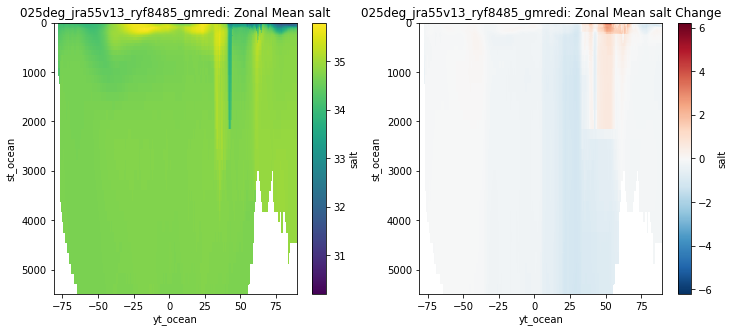

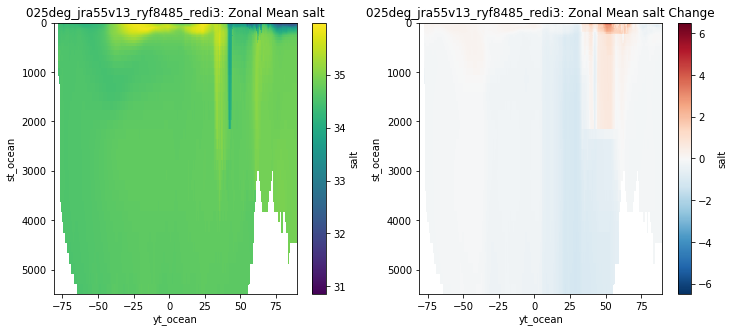

In [20]:
cc.plots.zonal_mean(esub[0:3],'salt',resolution=0.25)

# Model velocities (snapshot from ice model output)


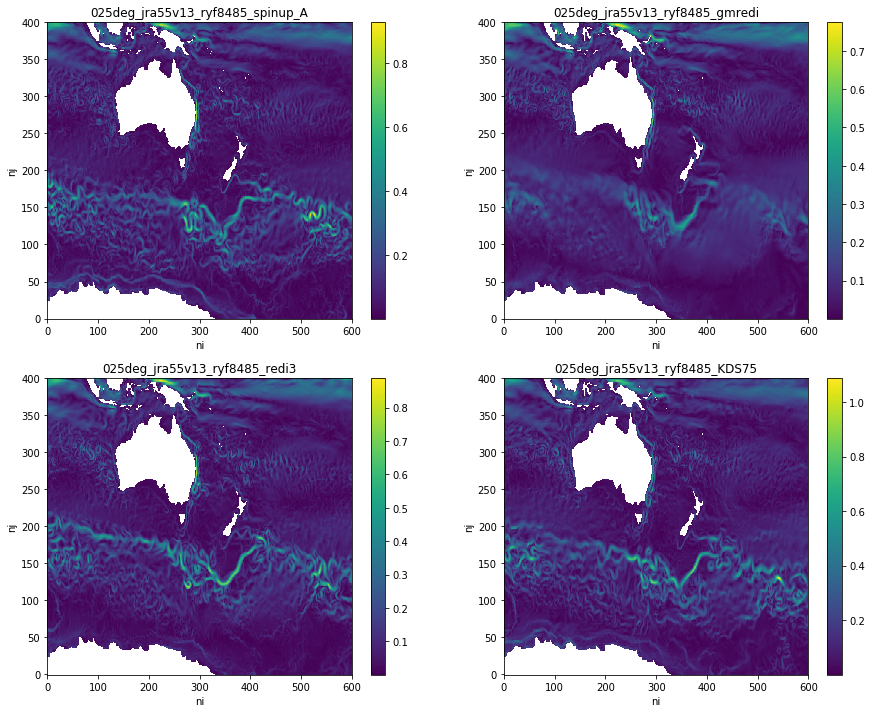

In [21]:
results = []
for e in esub:
    u025 = cc.get_nc_variable(e,'iceh.\d+-\d+.nc','uocn_m',n=1).isel(time=0).sel(nj=slice(100,500)).sel(ni=slice(0,600))
    v025 = cc.get_nc_variable(e,'iceh.\d+-\d+.nc','vocn_m',n=1).isel(time=0).sel(nj=slice(100,500)).sel(ni=slice(0,600))
    #lons025 = cc.get_nc_variable(e,'ocean_grid.nc','geolon_c',n=1).isel(time=0)
    #lats025 = cc.get_nc_variable(e,'ocean_grid.nc','geolat_c',n=1).isel(time=0)
    uv025 = np.sqrt(u025**2 + v025**2)
    result = {'uv025': uv025,
                'expt': e}
    results.append(result)

IPython.display.clear_output()
# plotting
plt.figure(figsize=(15,12))
nh = 0
for result in results:
    nh+=1
    uv025 = result['uv025']
    expt = result['expt']
    plt.subplot(2,2,nh)
    uv025.plot.pcolormesh()
    plt.title(expt)

# Mixed Layer Depths

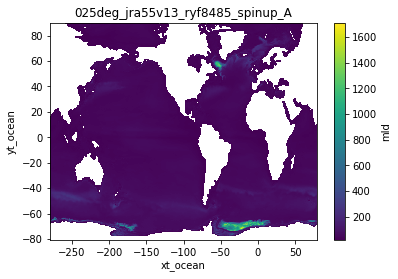

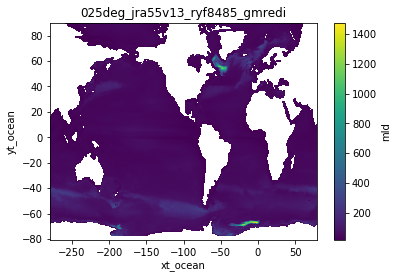

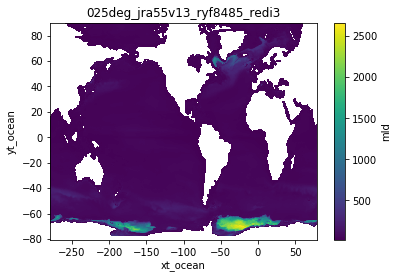

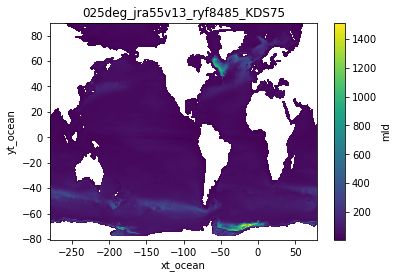

In [22]:
cc.plots.mixed_layer_depth(esub)

# Summary
1. While GM gives us pretty good overturning diagnostics, the degradation of KE and surface currents means it is not viable.
2. A small (300 m2/s) Redi diffusion improves many aspects of the simulation - including the abyssal overturning, Drake Passage transport, with a reasonable AMOC after 150 years. However, there are some caveats:
    * Is the abyssal overturning increase solely due to increased open ocean convection? It would appear so.
    * Surface salinity is much higher, and interior temperature lower, presumably due to enhanced vertical tracer fluxes in the Southern Ocean?
    * There remains a slight degreadation in fine scale currents due to the Redi diffusivity.
    
    Given these results, is it worth switching to the Redi case? Or should we find other ways to improve the abyssal circulation?
3. The third option that may help us is the possibility that improved vertical resolution will capture the dynamics better. This is the aim of the KDS75 simulation, but it's not yet at a stage where we can make a decision.

# Questions:
* Can we get a better answer by tapering GM? Need to check whether MOM does this for us automatically.
* Vertically varying Kappa_GM??
* Hallberg scheme?
* Other existing schemes within MOM5? Marshall says we can scale the Redi based on Rossby radius.